In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file1="Data Output/Toronto_Crimes_Occurred_2014_2019.csv"
crime_2014_2019=pd.read_csv(file1)
crime_2014_2019.head(1)

,Unnamed: 0,event_unique_id,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat
0,0,GO-20141756319,Commercial,1430.0,100.0,Assault,2014.0,March,24.0,83.0,...,24.0,83.0,Monday,1.0,Assault,D42,132,Malvern (132),-79.199081,43.800281


In [4]:
crime_2014_2019["occurrencehour"].dtypes

dtype('float64')

In [12]:
# Define a function to get the average number of cases on each hour
def hourly_num(df,mci_type,hours):
    num_crime=[]
    mci_df=df.loc[df["MCI"]==mci_type,:]
    for hour in hours:
        new_mci=mci_df.loc[mci_df["occurrencehour"]==hour,:]
        num_crime.append(len(new_mci["MCI"])/6)
    return num_crime

No handles with labels found to put in legend.


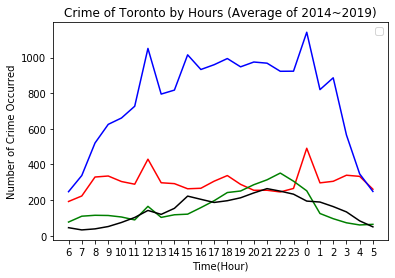

In [13]:
hours=[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5]
break_and_enter=hourly_num(crime_2014_2019,"Break and Enter",hours)
auto_theft=hourly_num(crime_2014_2019,"Auto Theft",hours)
robbery=hourly_num(crime_2014_2019,"Robbery",hours)
assault=hourly_num(crime_2014_2019,"Assault",hours)
x=["6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","0","1","2","3","4","5"]
plt.plot(x,break_and_enter,color="red")
plt.plot(x,auto_theft,color="green")
plt.plot(x,robbery,color="black")
plt.plot(x,assault,color="blue")
plt.xlabel("Time(Hour)")
plt.ylabel("Number of Crime Occurred")
plt.title("Crime of Toronto by Hours (Average of 2014~2019)")
plt.legend()
plt.show()